#### 1. Import Libraries and Define Paths

In [1]:
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Define dataset directories
base_dir = "D:/College/Sem 1/ML/Ml_research_paper_project/marine-animals-dataset_1/versions/1"
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')


#### Visulatization of input

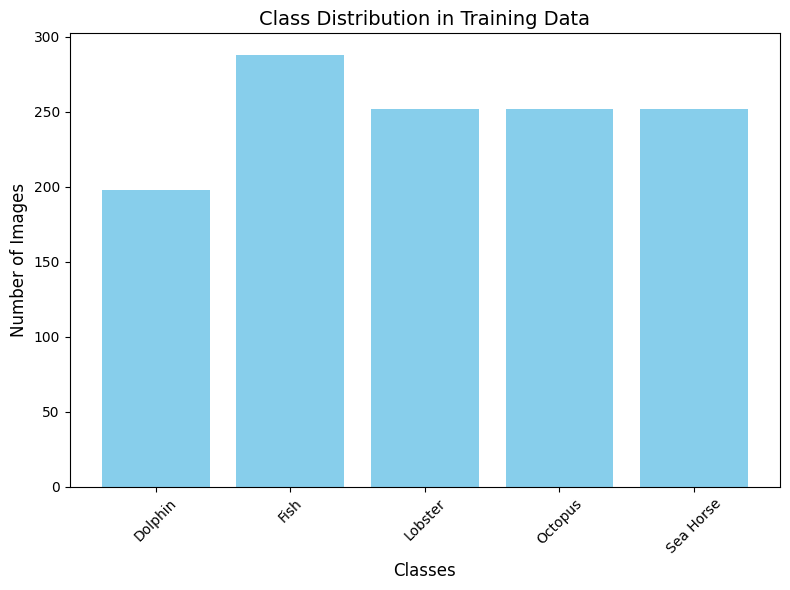

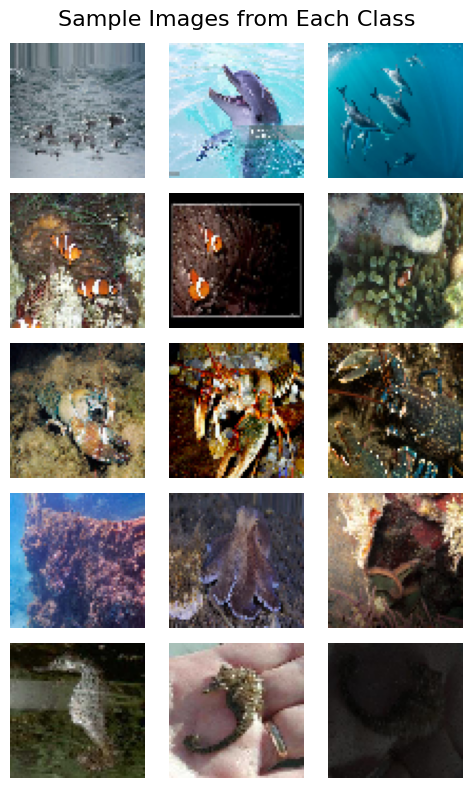

In [2]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array



# Visualize class distribution
def visualize_class_distribution(directory):
    class_counts = {cls: len(os.listdir(os.path.join(directory, cls))) for cls in os.listdir(directory)}
    
    plt.figure(figsize=(8, 6))
    plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
    plt.title("Class Distribution in Training Data", fontsize=14)
    plt.xlabel("Classes", fontsize=12)
    plt.ylabel("Number of Images", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Visualize sample images
def visualize_sample_images(directory, num_samples=3):
    classes = os.listdir(directory)
    plt.figure(figsize=(5, 8))
    
    for i, cls in enumerate(classes):
        class_dir = os.path.join(directory, cls)
        sample_images = os.listdir(class_dir)[:num_samples]
        
        for j, img_name in enumerate(sample_images):
            img_path = os.path.join(class_dir, img_name)
            img = load_img(img_path, target_size=(64, 64))  # Resize for visualization
            plt.subplot(len(classes), num_samples, i * num_samples + j + 1)
            plt.imshow(img)
            plt.axis('off')
            if j == 0:
                plt.ylabel(cls, fontsize=12)
    
    plt.suptitle("Sample Images from Each Class", fontsize=16)
    plt.tight_layout()
    plt.show()

# Call the functions
visualize_class_distribution(train_dir)
visualize_sample_images(train_dir)


#### 2. Load and Preprocess Data

In [3]:
# Load images as numpy arrays
datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load training data
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Resize all images to 128x128
    batch_size=32,
    class_mode='sparse',  # Outputs integer labels
    shuffle=True
)

# Load validation data
valid_data = datagen.flow_from_directory(
    valid_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

# Load test data
test_data = datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

# Extract data from generators into numpy arrays
def extract_data(generator):
    images, labels = [], []
    for _ in range(len(generator)):
        img, lbl = generator.__next__()  # Use __next__() or next(generator)
        images.append(img)
        labels.append(lbl)
    return np.vstack(images), np.concatenate(labels)

# Apply the function to training, validation, and test sets
X_train, y_train = extract_data(train_data)
X_valid, y_valid = extract_data(valid_data)
X_test, y_test = extract_data(test_data)


# Flatten image data for Random Forest
X_train = X_train.reshape(len(X_train), -1)
X_valid = X_valid.reshape(len(X_valid), -1)
X_test = X_test.reshape(len(X_test), -1)

# Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_valid = le.transform(y_valid)
y_test = le.transform(y_test)


Found 1241 images belonging to 5 classes.
Found 250 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


#### 3. Standardize Data

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


#### 4. Train Random Forest Classifier

In [5]:
# Initialize Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train on training data
rf_clf.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

#### 5. Evaluate the Model

In [6]:
# Validation Accuracy
y_val_pred = rf_clf.predict(X_valid)
val_accuracy = accuracy_score(y_valid, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Test Accuracy
y_test_pred = rf_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification Report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred, target_names=train_data.class_indices.keys()))


Validation Accuracy: 0.43
Test Accuracy: 0.42

Classification Report (Test Data):
              precision    recall  f1-score   support

     Dolphin       0.61      0.85      0.71        20
        Fish       0.25      0.30      0.27        20
     Lobster       0.47      0.35      0.40        20
     Octopus       0.33      0.30      0.32        20
   Sea Horse       0.40      0.30      0.34        20

    accuracy                           0.42       100
   macro avg       0.41      0.42      0.41       100
weighted avg       0.41      0.42      0.41       100



#### 6. Feature Importance (Optional)

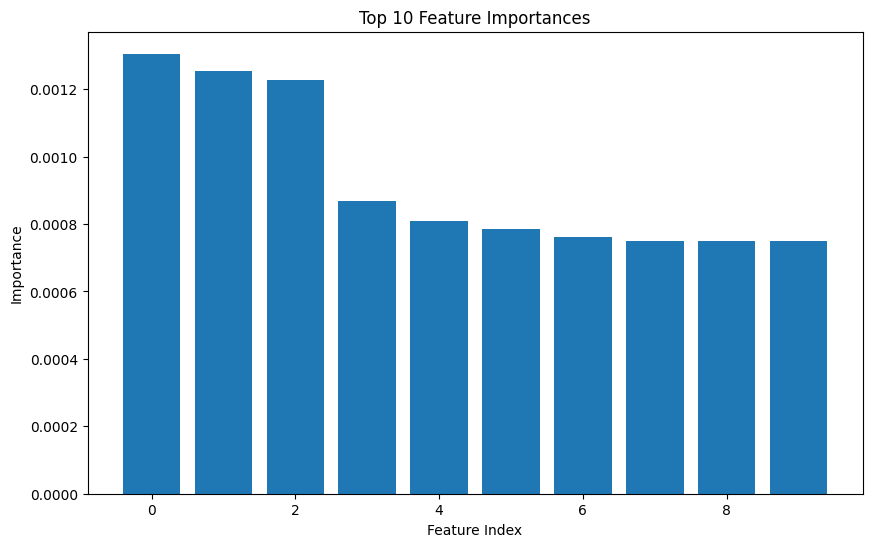

In [7]:
import matplotlib.pyplot as plt

# Feature Importance
importances = rf_clf.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(10), sorted(importances, reverse=True)[:10])
plt.title('Top 10 Feature Importances')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.show()


#### Apply PCA for Dimensionality Reduction

In [8]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [9]:
# Set the number of components (tune this value based on experiments)
n_components = 500  # Example: Reduce to 500 features

# Initialize PCA
pca = PCA(n_components=n_components, random_state=42)

# Fit PCA on training data and transform
X_train_pca = pca.fit_transform(X_train)

# Transform validation and test data
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

print(f"Original feature size: {X_train.shape[1]}")
print(f"Reduced feature size: {X_train_pca.shape[1]}")


Original feature size: 49152
Reduced feature size: 500


In [10]:
# Initialize Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train on PCA-transformed training data
rf_clf.fit(X_train_pca, y_train)

# Predict on validation set
y_valid_pred = rf_clf.predict(X_valid_pca)
val_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f"Validation Accuracy after PCA: {val_accuracy:.2f}")

# Predict on test set
y_test_pred = rf_clf.predict(X_test_pca)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy after PCA: {test_accuracy:.2f}")

# Classification Report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))


Validation Accuracy after PCA: 0.31
Test Accuracy after PCA: 0.38

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.55      0.85      0.67        20
           1       0.31      0.20      0.24        20
           2       0.50      0.40      0.44        20
           3       0.25      0.25      0.25        20
           4       0.20      0.20      0.20        20

    accuracy                           0.38       100
   macro avg       0.36      0.38      0.36       100
weighted avg       0.36      0.38      0.36       100



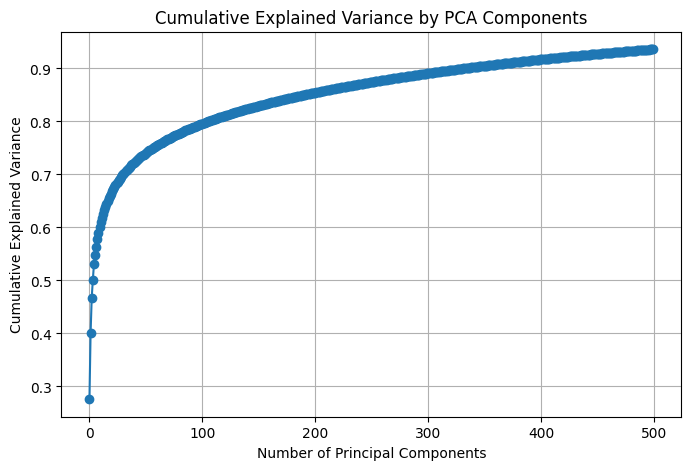

In [11]:
# Check explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative explained variance
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


In [12]:
# Optimal number of components based on variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
optimal_components = np.argmax(cumulative_variance >= 0.99) + 1  # Retain 99% variance
print(f"Optimal number of components for 99% variance: {optimal_components}")

# Re-run PCA with optimal components
pca = PCA(n_components=optimal_components, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)


Optimal number of components for 99% variance: 1


#### 1. Use a Pre-trained Model for Feature Extraction (e.g., VGG16)

In [13]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os

# Load the pre-trained VGG16 model without the top (classification) layers
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Function to extract features from images using VGG16
def extract_features_from_directory(directory):
    features = []
    labels = []
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                img = load_img(img_path, target_size=(128, 128))  # Resize to match input size
                img_array = img_to_array(img)
                img_array = np.expand_dims(img_array, axis=0)
                img_array = preprocess_input(img_array)  # Preprocessing for VGG16

                # Extract features using the VGG16 model
                feature = vgg_model.predict(img_array)
                feature = feature.flatten()  # Flatten the feature map to a 1D vector
                features.append(feature)
                labels.append(class_name)
    
    return np.array(features), np.array(labels)

# Extract features for training, validation, and test sets
X_train_features, y_train = extract_features_from_directory(train_dir)
X_valid_features, y_valid = extract_features_from_directory(valid_dir)
X_test_features, y_test = extract_features_from_directory(test_dir)

print(f"Training features shape: {X_train_features.shape}")
print(f"Validation features shape: {X_valid_features.shape}")
print(f"Test features shape: {X_test_features.shape}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━

#### Preprocess the Labels

In [14]:
from sklearn.preprocessing import LabelEncoder

# Encode labels as integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)
y_test_encoded = label_encoder.transform(y_test)

print(f"Encoded labels: {np.unique(y_train_encoded)}")


Encoded labels: [0 1 2 3 4]


#### Train the Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the Random Forest on extracted features
rf_clf.fit(X_train_features, y_train_encoded)

# Make predictions on the validation and test sets
y_valid_pred = rf_clf.predict(X_valid_features)
y_test_pred = rf_clf.predict(X_test_features)

# Calculate validation and test accuracy
val_accuracy = accuracy_score(y_valid_encoded, y_valid_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)

print(f"Validation Accuracy: {val_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print detailed classification report
print("\nClassification Report (Test Data):")
print(classification_report(y_test_encoded, y_test_pred, target_names=label_encoder.classes_))


Validation Accuracy: 0.72
Test Accuracy: 0.75

Classification Report (Test Data):
              precision    recall  f1-score   support

     Dolphin       0.83      0.95      0.88        20
        Fish       1.00      0.65      0.79        20
     Lobster       0.82      0.70      0.76        20
     Octopus       0.62      0.75      0.68        20
   Sea Horse       0.61      0.70      0.65        20

    accuracy                           0.75       100
   macro avg       0.78      0.75      0.75       100
weighted avg       0.78      0.75      0.75       100



#### Hyperparameter Tuning

In [16]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Perform grid search
grid_search.fit(X_train_features, y_train_encoded)

# Best parameters found by GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate using the best estimator
best_rf_clf = grid_search.best_estimator_
y_test_pred = best_rf_clf.predict(X_test_features)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)

print(f"Test Accuracy after Hyperparameter Tuning: {test_accuracy:.2f}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Test Accuracy after Hyperparameter Tuning: 0.78


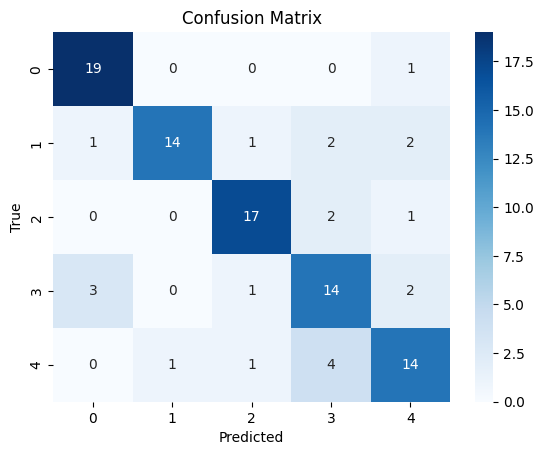

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
